# Sequence to Sequence Learning with Neural Networks

# 利用神经网络进行序列到序列的学习

# Abstract

# 摘要



Deep Neural Networks (DNNs) are powerful models that have achieved excellent performance on difficult learning tasks. Although DNNs work well whenever large labeled training sets are available, they cannot be used to map sequences to sequences. In this paper, we present a general end-to-end approach to sequence learning that makes minimal assumptions on the sequence structure. Our method uses a multilayered Long Short-Term Memory (LSTM) to map the input sequence to a vector of a fixed dimensionality, and then another deep LSTM to decode the target sequence from the vector. Our main result is that on an English to French translation task from the WMT’14 dataset, the translations produced by the LSTM achieve a BLEU score of 34.8 on the entire test set, where the LSTM’s BLEU score was penalized on out-of-vocabulary words. Additionally, the LSTM did not have difficulty on long sentences. For comparison, a phrase-based SMT system achieves a BLEU score of 33.3 on the same dataset. When we used the LSTM to rerank the 1000 hypotheses produced by the aforementioned SMT system, its BLEU score increases to 36.5, which is close to the previous best result on this task. The LSTM also learned sensible phrase and sentence representations that are sensitive to word order and are relatively invariant to the active and the passive voice. Finally, we found that reversing the order of the words in all source sentences (but not target sentences) improved the LSTM’s performance markedly, because doing so introduced many short term dependencies between the source and the target sentence which made the optimization problem easier.

深度神经网络(DNNs)是一种功能强大的模型，在困难的学习任务中取得了优异的成绩。尽管DNNs在大型标记训练集可用的情况下工作良好，但它们不能用于将序列映射到序列。在本文中，我们提出了一种对序列结构做最小假设的一般端到端序列学习方法。我们的方法使用一个多层的长短期记忆(LSTM)将输入序列映射到一个固定维数的向量，然后再使用另一个深层LSTM从向量中解码目标序列。我们的主要结果是，在来自WMT’14数据集的英法翻译任务中，LSTM生成的翻译在整个测试集上获得了34.8的BLEU分数，而LSTM的BLEU分数在词汇表外的单词上受到了惩罚。此外，LSTM在长句子上没有困难。作为比较，基于短语的SMT系统在同一数据集上获得了33.3的BLEU得分。当我们使用LSTM对前面提到的SMT系统产生的1000个假设进行重新排序时，它的BLEU分数增加到36.5，这接近于之前在这项任务中的最佳结果。LSTM还学习了对词序敏感、对主动语态和被动语态相对不变的敏感短语和句子表示。最后，我们发现颠倒所有源语句(但不包括目标语句)中的单词顺序可以显著提高LSTM的性能，因为这样做会在源语句和目标语句之间引入许多短期依赖性，从而使优化问题变得更容易。


# 1 Introduction

# 1介绍



Deep Neural Networks (DNNs) are extremely powerful machine learning models that achieve excellent performance on difficult problems such as speech recognition and visual object recognition . DNNs are powerful because they can perform arbitrary parallel computation for a modest number of steps. A surprising example of the power of DNNs is their ability to sort N N-bit numbers using only 2 hidden layers of quadratic size. So, while neural networks are related to conventional statistical models, they learn an intricate computation. Furthermore, large DNNs can be trained with supervised backpropagation whenever the labeled training set has enough information to specify the network’s parameters. Thus, if there exists a parameter setting of a large DNN that achieves good results (for example, because humans can solve the task very rapidly), supervised backpropagation will find these parameters and solve the problem.

深度神经网络(DNNs)是一种功能非常强大的机器学习模型，在语音识别和视觉对象识别等困难问题上表现优异。dnn功能强大，因为它可以在有限的步骤内执行任意的并行计算。DNNs强大功能的一个令人惊讶的例子是，它仅使用2个二次大小的隐藏层就可以对N个N位的数字进行排序。因此，虽然神经网络与传统的统计模型有关，但它们学习的是复杂的计算。此外，只要标记的训练集有足够的信息来指定网络的参数，就可以使用监督反向传播来训练大型dnn。因此，如果存在一个大的DNN的参数设置，并且取得了很好的结果(例如，因为人类可以非常快速地解决任务)，监督反向传播就会找到这些参数并解决问题。



Despite their flexibility and power, DNNs can only be applied to problems whose inputs and targets can be sensibly encoded with vectors of fixed dimensionality. It is a significant limitation, since many important problems are best expressed with sequences whose lengths are not known a-priori. For example, speech recognition and machine translation are sequential problems. Likewise, question answering can also be seen as mapping a sequence of words representing the question to a sequence of words representing the answer. It is therefore clear that a domain-independent method that learns to map sequences to sequences would be useful.

尽管DNNs具有灵活性和强大的功能，但它只适用于输入和目标可以用固定维数的向量进行合理编码的问题。这是一个重要的限制，因为许多重要的问题最好用长度未知的序列来表示。例如，语音识别和机器翻译是顺序问题。同样，问题回答也可以看作是将表示问题的单词序列映射到表示答案的单词序列。因此，一种学习将序列映射到序列的与域无关的方法将非常有用。

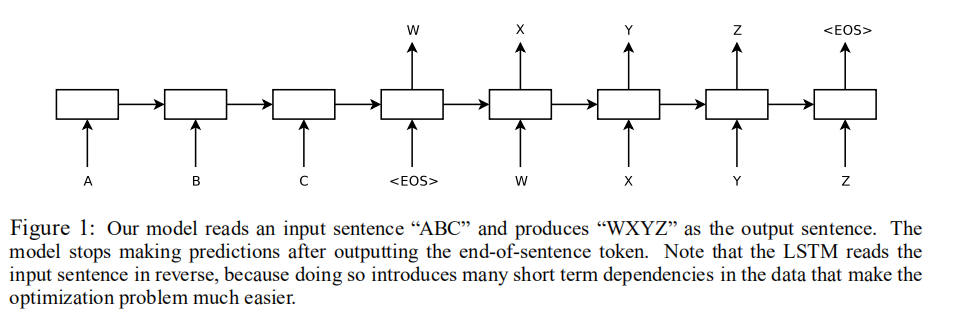

Sequences pose a challenge for DNNs because they require that the dimensionality of the inputs and outputs is known and fixed. In this paper, we show that a straightforward application of the Long Short-Term Memory (LSTM) architecture [16] can solve general sequence to sequence problems. The idea is to use one LSTM to read the input sequence, one timestep at a time, to obtain large fixed dimensional vector representation, and then to use another LSTM to extract the output sequence from that vector (fig. 1). The second LSTM is essentially a recurrent neural network language model [28, 23, 30] except that it is conditioned on the input sequence. The LSTM’s ability to successfully learn on data with long range temporal dependencies makes it a natural choice for this application due to the considerable time lag between the inputs and their corresponding outputs (fig. 1).

序列对DNNs是一个挑战，因为它们要求输入和输出的维度是已知的和固定的。在本文中，我们证明了一个简单的应用LSTM架构的[16]可以解决一般序列到序列的问题。这个想法是使用一个LSTM读输入序列,一次一个timestep,为了获得大固定维度向量表示,然后使用另一个LSTM从向量中提取的输出序列(图1)。第二个LSTM递归神经网络本质上是一个语言模型[28, 23, 30],除了它是条件输入序列。LSTM能够成功地学习具有长期时间依赖性的数据，这使得它成为这个应用程序的自然选择，因为输入和相应输出之间存在相当大的时间延迟(图1)。



There have been a number of related attempts to address the general sequence to sequence learning problem with neural networks. Our approach is closely related to Kalchbrenner and Blunsom [18] who were the first to map the entire input sentence to vector, and is related to Cho et al.  although the latter was used only for rescoring hypotheses produced by a phrase-based system. Graves [10] introduced a novel differentiable attention mechanism that allows neural networks to focus on different parts of their input, and an elegant variant of this idea was successfully applied to machine translation by Bahdanau et al. The Connectionist Sequence Classification is another popular technique for mapping sequences to sequences with neural networks, but it assumes a monotonic alignment between the inputs and the outputs .

已经有一些相关的尝试来解决神经网络的一般序列到序列的学习问题。我们的方法与Kalchbrenner和Blunsom[18]密切相关，他们是第一个将整个输入语句映射到向量的人，并且与Cho等人相关，尽管后者仅用于重新提取基于短语的系统产生的假设。Graves[10]引入了一种新颖的可微注意机制，该机制允许神经网络将注意力集中在输入的不同部分，Bahdanau等人成功地将这一思想的一个优雅变体应用到机器翻译中。连接序列分类是另一种使用神经网络将序列映射到序列的流行技术，但它假设输入和输出之间是单调对齐的。



The main result of this work is the following. On the WMT’14 English to French translation task, we obtained a BLEU score of 34.81 by directly extracting translations from an ensemble of 5 deep LSTMs (with 384M parameters and 8,000 dimensional state each) using a simple left-to-right beamsearch decoder. This is by far the best result achieved by direct translation with large neural networks. For comparison, the BLEU score of an SMT baseline on this dataset is 33.30. The 34.81 BLEU score was achieved by an LSTM with a vocabulary of 80k words, so the score was penalized whenever the reference translation contained a word not covered by these 80k. This result shows that a relatively unoptimized small-vocabulary neural network architecture which has much room for improvement outperforms a phrase-based SMT system.

这项工作的主要结果如下。在WMT '14英法翻译任务中，我们使用一个简单的从左到右的波束搜索解码器直接从5层深度LSTMs(每个LSTMs有384M参数和8000维状态)中提取翻译，从而获得了34.81的BLEU评分。这是迄今为止使用大型神经网络直接翻译所获得的最佳结果。作为比较，该数据集的SMT基线的BLEU评分为33.30。BLEU的34.81分是由词汇量为80k的LSTM获得的，所以只要参考译文中有不属于这80k的单词，该分数就会被扣除。这一结果表明，相对于基于短语的SMT系统，一个相对没有优化的小词汇量神经网络体系结构有很大的改进空间。



Finally, we used the LSTM to rescore the publicly available 1000-best lists of the SMT baseline on the same task . By doing so, we obtained a BLEU score of 36.5, which improves the baseline by 3.2 BLEU points and is close to the previous best published result on this task (which is 37.0).

最后，我们使用LSTM对同一任务上的公开的SMT基线的1000个最佳列表进行重新划分。通过这样做，我们获得了36.5的BLEU评分，这将基线提高了3.2个BLEU评分，接近于之前发布的该任务的最佳结果(37.0)。



Surprisingly, the LSTM did not suffer on very long sentences, despite the recent experience of other researchers with related architectures. We were able to do well on long sentences because we reversed the order of words in the source sentence but not the target sentences in the training and test set. By doing so, we introduced many short term dependencies that made the optimization problem much simpler (see sec. 2 and 3.3). As a result, SGD could learn LSTMs that had no trouble with long sentences. The simple trick of reversing the words in the source sentence is one of the key technical contributions of this work.

令人惊讶的是，LSTM在很长的句子中并没有受到影响，尽管其他研究相关体系结构的研究人员最近也有过类似的经历。我们能够做的长句,因为我们翻转源句子中单词的顺序而不是目标句子训练集和测试集。通过这样做,我们介绍了许多短期依赖关系的优化问题更简单(见 sec. 2 and 3.3)。因此，SGD可以学习不受长句困扰的LSTMs。在源句中颠倒单词的简单技巧是这项工作的关键技术贡献之一。



A useful property of the LSTM is that it learns to map an input sentence of variable length into a fixed-dimensional vector representation. Given that translations tend to be paraphrases of the source sentences, the translation objective encourages the LSTM to find sentence representations that capture their meaning, as sentences with similar meanings are close to each other while different sentences meanings will be far. A qualitative evaluation supports this claim, showing that our model is aware of word order and is fairly invariant to the active and passive voice.

LSTM的一个有用的特性是，它学会将一个可变长度的输入语句映射到一个固定维向量表示。考虑到译文往往是原句的意译，翻译目标鼓励LSTM寻找能够捕捉其含义的句子表示，因为具有相似含义的句子彼此接近，而具有不同含义的句子则相差很远。一个定性的评估支持这一主张，表明我们的模型是意识到语序和相当不变的主动和被动语态。

# 2 The model

# 2模型



The Recurrent Neural Network (RNN) is a natural generalization of feedforward neural networks to sequences. Given a sequence of inputs (x1, . . . , xT ), a standard RNN computes a sequence of outputs (y1, . . . , yT ) by iterating the following equation:

递归神经网络(RNN)是前馈神经网络对序列的一种自然推广。给定一个输入序列(x1, . . . , xT )，一个标准的RNN计算一个输出序列(y1, . . . , yT )，迭代如下方程:

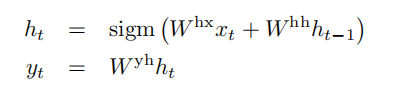

The RNN can easily map sequences to sequences whenever the alignment between the inputs the outputs is known ahead of time. However, it is not clear how to apply an RNN to problems whose input and the output sequences have different lengths with complicated and non-monotonic relationships.

只要提前知道输入和输出之间的对齐，RNN就可以轻松地将序列映射到序列。然而，对于输入和输出序列长度不同且具有复杂非单调关系的问题，如何应用RNN还不清楚。



The simplest strategy for general sequence learning is to map the input sequence to a fixed-sized vector using one RNN, and then to map the vector to the target sequence with another RNN (this approach has also been taken by Cho et al. [5]). While it could work in principle since the RNN is provided with all the relevant information, it would be difficult to train the RNNs due to the resulting long term dependencies (figure 1). However, the Long Short-Term Memory (LSTM) is known to learn problems with long range temporal dependencies, so an LSTM may succeed in this setting.

一般序列学习最简单的策略是使用一个RNN将输入序列映射到一个固定大小的向量，然后用另一个RNN将该向量映射到目标序列(Cho等人也采用了这种方法。[5])。虽然工作原则上自RNN提供所有相关信息,很难训练RNNs由于长期依赖关系(图1)。然而,长期短期记忆(LSTM)是已知的学习问题长时间的依赖关系,所以一个LSTM可能在此设置成功。



The goal of the LSTM is to estimate the conditional probability p(y1, . . . , yT′ |x1, . . . , xT ) where (x1, . . . , xT ) is an input sequence and y1, . . . , yT′ is its corresponding output sequence whose length T ′ may differ from T . The LSTM computes this conditional probability by first obtaining the fixeddimensional representation v of the input sequence (x1, . . . , xT ) given by the last hidden state of the LSTM, and then computing the probability of y1, . . . , yT′ with a standard LSTM-LM formulation whose initial hidden state is set to the representation v of x1, . . . , xT :

LSTM的目标是估计条件概率p(y1, . . . , yT′ |x1, . . . , xT )，(x1, . . . , xT )是一个输入序列， y1, . . . , yT′是其对应的输出序列，其长度T '可能与T不同。LSTM通过首先获得输入序列(x1, . . . , xT )的固定维表示v ，由LSTM的最后一个隐藏状态给出，然后计算y1, . . . , yT′的概率，与标准LSTM-LM公式，其初始隐藏状态设置为 x1, . . . , xT的表示v:

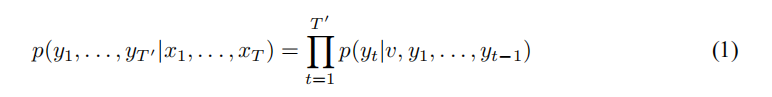

In this equation, each p(yt|v, y1, . . . , yt-1) distribution is represented with a softmax over all the words in the vocabulary. We use the LSTM formulation from Graves [10]. Note that we require that each sentence ends with a special end-of-sentence symbol “<EOS>”, which enables the model to define a distribution over sequences of all possible lengths. The overall scheme is outlined in figure 1, where the shown LSTM computes the representation of “A”, “B”, “C”, “<EOS>” and then uses this representation to compute the probability of “W”, “X”, “Y”, “Z”, “<EOS>”.

在这个方程中，每p(yt|v, y1, . . . , yt-1)分布用一个softmax表示在词汇表中的所有单词。我们使用Graves[10]的LSTM公式。注意，我们要求每个句子都以一个特殊的句尾符号“<EOS>”结束，这使模型能够定义所有可能长度的序列上的分布。总体方案如图1所示，其中所示的LSTM计算“A”、“B”、“C”、“<EOS>”的表示，然后使用此表示来计算“W”、“X”、“Y”、“Z”、“<EOS>”的概率。



Our actual models differ from the above description in three important ways. First, we used two different LSTMs: one for the input sequence and another for the output sequence, because doing so increases the number model parameters at negligible computational cost and makes it natural to train the LSTM on multiple language pairs simultaneously [18]. Second, we found that deep LSTMs significantly outperformed shallow LSTMs, so we chose an LSTM with four layers. Third, we found it extremely valuable to reverse the order of the words of the input sentence. So for example, instead of mapping the sentence a, b, c to the sentence α, β, γ, the LSTM is asked to map c, b, a to α, β, γ, where α, β, γ is the translation of a, b, c. This way, a is in close proximity to α, b is fairly close to β, and so on, a fact that makes it easy for SGD to “establish communication” between the input and the output. We found this simple data transformation to greatly improve the performance of the LSTM.

我们的实际模型在三个重要方面与上述描述不同。首先，我们使用了两种不同的LSTM:一种用于输入序列，另一种用于输出序列，因为这样做增加了数量模型参数，而计算成本可以忽略不计，并且使在多个语言对上同时训练LSTM变得很自然。其次，我们发现深度LSTM明显优于浅层LSTM，因此我们选择了一个具有四层的LSTM。第三，我们发现将输入句的单词顺序颠倒是非常有价值的。例如,而不是映射句子a,b, c到句子α,β,γ,要求LSTM映射c, b, a到α,β,γ，α,β,γ是翻译的a, b, c。这样,一个是在靠近α,b是相当接近β,等等,这一事实使得SGD更容易“建立通信”之间的输入和输出。我们发现这个简单的数据转换大大提高了LSTM的性能。

# 3 Experiments

# 3实验



We applied our method to the WMT’14 English to French MT task in two ways. We used it to directly translate the input sentence without using a reference SMT system and we it to rescore the n-best lists of an SMT baseline. We report the accuracy of these translation methods, present sample translations, and visualize the resulting sentence representation.

我们以两种方式将我们的方法应用于WMT ' 14英语到法语的MT任务。我们使用它来直接翻译输入语句，而不使用参考SMT系统，我们使用它来重新确定SMT基线的n个最佳列表。我们报告这些翻译方法的准确性，提供示例翻译，并将结果的句子表示可视化。



## 3.1 Dataset details

## 3.1数据集的细节



We used the WMT’14 English to French dataset. We trained our models on a subset of 12M sentences consisting of 348M French words and 304M English words, which is a clean “selected” subset from [29]. We chose this translation task and this specific training set subset because of the public availability of a tokenized training and test set together with 1000-best lists from the baseline SMT [29].

我们使用了从英语到法语的WMT ' 14数据集。我们将我们的模型训练在一个包含3.48亿法语单词和3.04亿英语单词的1200万句子子集上，这是从[29]中挑选出来的一个干净的子集。我们选择这个翻译任务和这个特定的训练集子集是因为一个标记化的训练和测试集以及来自基线SMT[29]的1000个最佳列表的公共可用性。



As typical neural language models rely on a vector representation for each word, we used a fixed vocabulary for both languages. We used 160,000 of the most frequent words for the source language and 80,000 of the most frequent words for the target language. Every out-of-vocabulary word was replaced with a special “UNK” token.

由于典型的神经语言模型依赖于每个单词的向量表示，因此我们对两种语言都使用了固定的词汇表。我们在源语言中使用了16万个最常用的单词，在目标语言中使用了8万个最常用的单词。每一个词汇表以外的单词都被替换为一个特殊的“UNK”标记。



## 3.2 Decoding and Rescoring

## 3.2解码和重建



The core of our experiments involved training a large deep LSTM on many sentence pairs. We trained it by maximizing the log probability of a correct translation T given the source sentence S, so the training objective is 

我们实验的核心是在许多句子对上训练一个大型的深层LSTM。我们通过最大化给定源语句S的正确翻译T的对数概率来训练它，所以训练目标是

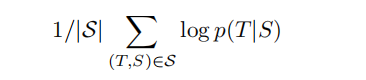

where S is the training set. Once training is complete, we produce translations by finding the most likely translation according to the LSTM:

其中S为训练集，一旦训练完成，我们根据LSTM找到最可能的译文，生成译文:

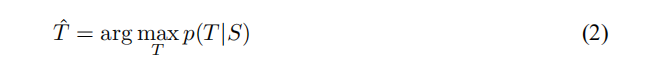

We search for the most likely translation using a simple left-to-right beam search decoder which maintains a small number B of partial hypotheses, where a partial hypothesis is a prefix of some translation. At each timestep we extend each partial hypothesis in the beam with every possible word in the vocabulary. This greatly increases the number of the hypotheses so we discard all but the B most likely hypotheses according to the model’s log probability. As soon as the “<EOS>” symbol is appended to a hypothesis, it is removed from the beam and is added to the set of complete hypotheses. While this decoder is approximate, it is simple to implement. Interestingly, our system performs well even with a beam size of 1, and a beam of size 2 provides most of the benefits of beam search (Table 1).

我们使用一个简单的从左到右集束搜索解码器来搜索最有可能的翻译，该解码器保留了少量的部分假设，其中部分假设是一些翻译的前缀。在每一个时间步中，我们用词汇表中的每一个可能的单词扩展光束中的每一个部分假设。这大大增加了假设的数量，因此根据模型的log概率，我们抛弃了除B之外的所有最有可能的假设。一旦将“<EOS>”符号添加到假设中，它就会从波束中移除，并添加到完整假设集中。虽然这个解码器是近似的，但它很容易实现。有趣的是，我们的系统即使在波束大小为1的情况下也能执行得很好，而波束大小为2的情况提供了波束搜索的大部分好处(表1)。

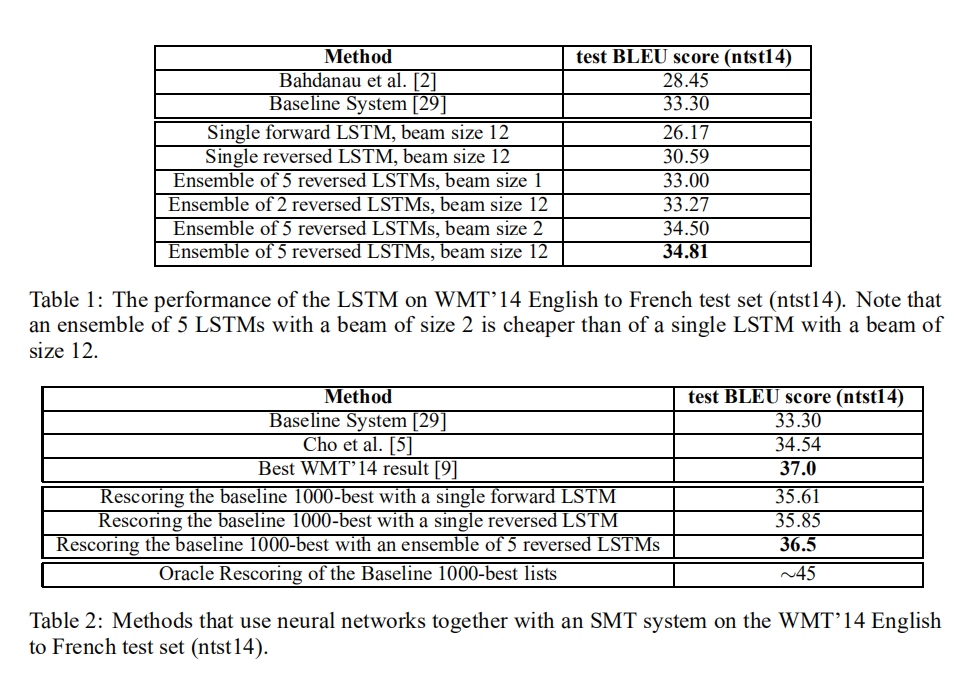

We also used the LSTM to rescore the 1000-best lists produced by the baseline system. To rescore an n-best list, we computed the log probability of every hypothesis with our LSTM and took an even average with their score and the LSTM’s score.

我们还使用LSTM重新确定基线系统产生的1000个最佳列表。为了重新确定一个n-best列表，我们用LSTM计算每个假设的log概率，并对它们的得分和LSTM的得分取平均。



## 3.3 Reversing the Source Sentences

## 3.3翻转原句子



While the LSTM is capable of solving problems with long term dependencies, we discovered that the LSTM learns much better when the source sentences are reversed (the target sentences are not reversed). By doing so, the LSTM’s test perplexity dropped from 5.8 to 4.7, and the test BLEU scores of its decoded translations increased from 25.9 to 30.6.

虽然LSTM能够解决具有长期依赖关系的问题，但是我们发现，当源语句被反转(目标语句没有被反转)时，LSTM可以更好地学习。这样一来，LSTM的困惑度从5.8下降到4.7，其解码翻译的测试BLEU分数从25.9增加到30.6。



While we do not have a complete explanation to this phenomenon, we believe that it is caused by the introduction of many short term dependencies to the dataset. Normally, when we concatenate a source sentence with a target sentence, each word in the source sentence is far from its corresponding word in the target sentence. As a result, the problem has a large “minimal time lag” [17]. By reversing the words in the source sentence, the average distance between corresponding words in the source and target language is unchanged. However, the first few words in the source language are now very close to the first few words in the target language, so the problem’s minimal time lag is greatly reduced. Thus, backpropagation has an easier time “establishing communication” between the source sentence and the target sentence, which in turn results in substantially improved overall performance.

虽然我们对这一现象没有一个完整的解释，但我们认为这是由于向数据集引入了许多短期依赖关系造成的。通常，当我们把一个源句和一个目标句连接起来时，源句中的每个单词都与目标句中的对应单词相差很远。因此，这个问题有一个很大的“最小延迟”[17]。通过对原句中的词进行倒序，可以保持原语中对应词与目的语中对应词之间的平均距离不变。然而，源语言的前几个单词现在与目标语言的前几个单词非常接近，因此问题的最小时滞大大减少。因此，反向传播更容易在源句和目标句之间“建立通信”，从而大大提高了整体性能。



Initially, we believed that reversing the input sentences would only lead to more confident predictions in the early parts of the target sentence and to less confident predictions in the later parts. However, LSTMs trained on reversed source sentences did much better on long sentences than LSTMs trained on the raw source sentences (see sec. 3.7), which suggests that reversing the input sentences results in LSTMs with better memory utilization.

起初，我们认为把输入的句子反过来只会在目标句的前半部分产生更有信心的预测，而在后半部分产生不那么有信心的预测。然而，训练倒写源语句的LSTMs在长句上的表现要比训练原始源语句的LSTMs好得多(见第3.7节)，这表明倒写输入语句的LSTMs具有更好的记忆利用率。



## 3.4 Training details

## 3.4训练细节



We found that the LSTM models are fairly easy to train. We used deep LSTMs with 4 layers, with 1000 cells at each layer and 1000 dimensional word embeddings, with an input vocabulary of 160,000 and an output vocabulary of 80,000. Thus the deep LSTM uses 8000 real numbers to represent a sentence. We found deep LSTMs to significantly outperform shallow LSTMs, where each additional layer reduced perplexity by nearly 10%, possibly due to their much larger hidden state. We used a naive softmax over 80,000 words at each output. The resulting LSTM has 384M parameters of which 64M are pure recurrent connections (32M for the “encoder” LSTM and 32M for the “decoder” LSTM). The complete training details are given below: 

我们发现LSTM模型很容易训练。我们使用了4层的深度LSTMs，每层有1000个单元和1000个多维单词嵌入，输入词汇表为16万，输出词汇表为8万。因此，深层LSTM使用8000个实数来表示一个句子。我们发现深层的LSTMs明显优于浅层的LSTMs，其中每一层都减少了近10%的困惑，这可能是由于它们的隐藏状态更大。我们用一个朴素的softmax，每个输出超过80000个单词。产生的LSTM有384M的参数，其中64M是纯循环连接(32M用于“编码器”LSTM, 32M用于“解码器”LSTM)。完整的训练详情如下:



• We initialized all of the LSTM’s parameters with the uniform distribution between -0.08 and 0.08 

•我们初始化LSTM的所有参数，参数的均匀分布在-0.08和0.08之间



• We used stochastic gradient descent without momentum, with a fixed learning rate of 0.7.After 5 epochs, we begun halving the learning rate every half epoch. We trained our models for a total of 7.5 epochs. 

•我们使用了没有动量的随机梯度下降，固定学习率为0.7。在5轮之后，我们开始每半轮将学习率减半。我们总共训练了7.5轮的模型。



• We used batches of 128 sequences for the gradient and divided it the size of the batch (namely, 128). 

•我们使用128作为序列长度，并将其划分为批次的大小(即128)。



• Although LSTMs tend to not suffer from the vanishing gradient problem, they can have exploding gradients. Thus we enforced a hard constraint on the norm of the gradient [10, 25] by scaling it when its norm exceeded a threshold. For each training batch, we compute s = ||g||2 , where g is the gradient divided by 128. If s > 5, we set g = 5g/s . 

•尽管lstm往往不受消失梯度问题的影响，但它们可能会有爆炸性梯度。因此，当梯度的范数超过阈值时，我们对其进行缩放，从而对梯度的范数施加硬约束[10,25]。对于每个训练batch，我们计算s = ||g||2，其中g是梯度除以128。设g = 5g/s。



• Different sentences have different lengths. Most sentences are short (e.g., length 20-30) but some sentences are long (e.g., length > 100), so a minibatch of 128 randomly chosen training sentences will have many short sentences and few long sentences, and as a result, much of the computation in the minibatch is wasted. To address this problem, we made sure that all sentences in a minibatch are roughly of the same length, yielding a 2x speedup.

•不同的句子有不同的长度。大多数句子都很短(例如，长度20-30)，但是有些句子很长(例如，长度> 100)，所以一个128个随机选择的训练句子会有很多短句子和很少的长句子，因此，在minibatch中大量的计算被浪费了。为了解决这个问题，我们确保一个minibatch中的所有句子长度大致相同，从而产生2x的加速效果。



## 3.5 Parallelization

## 3.5并行化



A C++ implementation of deep LSTM with the configuration from the previous section on a single GPU processes a speed of approximately 1,700 words per second. This was too slow for our purposes, so we parallelized our model using an 8-GPU machine. Each layer of the LSTM was executed on a different GPU and communicated its activations to the next GPU / layer as soon as they were computed. Our models have 4 layers of LSTMs, each of which resides on a separate GPU. The remaining 4 GPUs were used to parallelize the softmax, so each GPU was responsible for multiplying by a 1000 × 20000 matrix. The resulting implementation achieved a speed of 6,300 (both English and French) words per second with a minibatch size of 128. Training took about a ten days with this implementation.

一个c++实现的深层LSTM与配置从上一节单GPU处理速度约1700字每秒。这对于我们的目的来说太慢了，所以我们使用8-GPU机器来并行化我们的模型。LSTM的每一层都在不同的GPU上执行，并在计算后立即将其激活传递给下一层GPU /层。我们的模型有4层LSTMs，每一层都位于一个单独的GPU上。剩下的4个GPU用于并行化softmax，因此每个GPU负责乘以一个1000×20000矩阵。最终实现的速度达到每秒6300个单词(包括英语和法语)，最小批处理大小为128。这个实现花了大约10天的时间进行训练。



## 3.6 Experimental Results

## 3.6实验结果



We used the cased BLEU score [24] to evaluate the quality of our translations. We computed our BLEU scores using multi-bleu.pl on the tokenized predictions and ground truth. This way of evaluating the BELU score is consistent with [5] and [2], and reproduces the 33.3 score of [29]. However, if we evaluate the best WMT’14 system [9] (whose predictions can be downloaded from statmt.org\matrix) in this manner, we get 37.0, which is greater than the 35.8 reported by statmt.org\matrix.

我们使用了装箱的BLEU评分[24]来评估翻译的质量。我们使用multi-bleu.pl计算我们的BLEU分数，关于预测和标签。这种评价BELU评分的方法与[5]、[2]一致，再现了[29]的33.3分。然而，如果我们以这种方式评估最佳的WMT'14系统(其预测可以statmt.org\matrix下载)，我们得到37.0，比statmt.org\matrix.报告的35.8大。



The results are presented in tables 1 and 2. Our best results are obtained with an ensemble of LSTMs that differ in their random initializations and in the random order of minibatches. While the decoded translations of the LSTM ensemble do not outperform the best WMT’14 system, it is the first time that a pure neural translation system outperforms a phrase-based SMT baseline on a large scale MT task by a sizeable margin, despite its inability to handle out-of-vocabulary words. The LSTM is within 0.5 BLEU points of the best WMT’14 result if it is used to rescore the 1000-best list of the baseline system.

结果见表1和表2。我们的最佳结果是在LSTMs的集合中获得的，这些LSTMs的随机初始化和小批量随机顺序各不相同。虽然LSTM集成的译码翻译并没有超过最佳的WMT'14系统，但这是第一次在大规模MT任务中，一个纯神经翻译系统比基于短语的SMT基线有更大的优势，尽管它无法处理词汇表外的单词。如果使用LSTM重新确定基线系统的1000个最佳列表，则LSTM在最佳WMT'14结果的0.5个BLEU点以内。



## 3.7 Performance on long sentences

## 3.7长句的表现



We were surprised to discover that the LSTM did well on long sentences, which is shown quantitatively in figure 3. Table 3 presents several examples of long sentences and their translations.

我们惊奇地发现LSTM在长句方面做得很好，如图3所示。表3给出了几个长句及其翻译的例子。

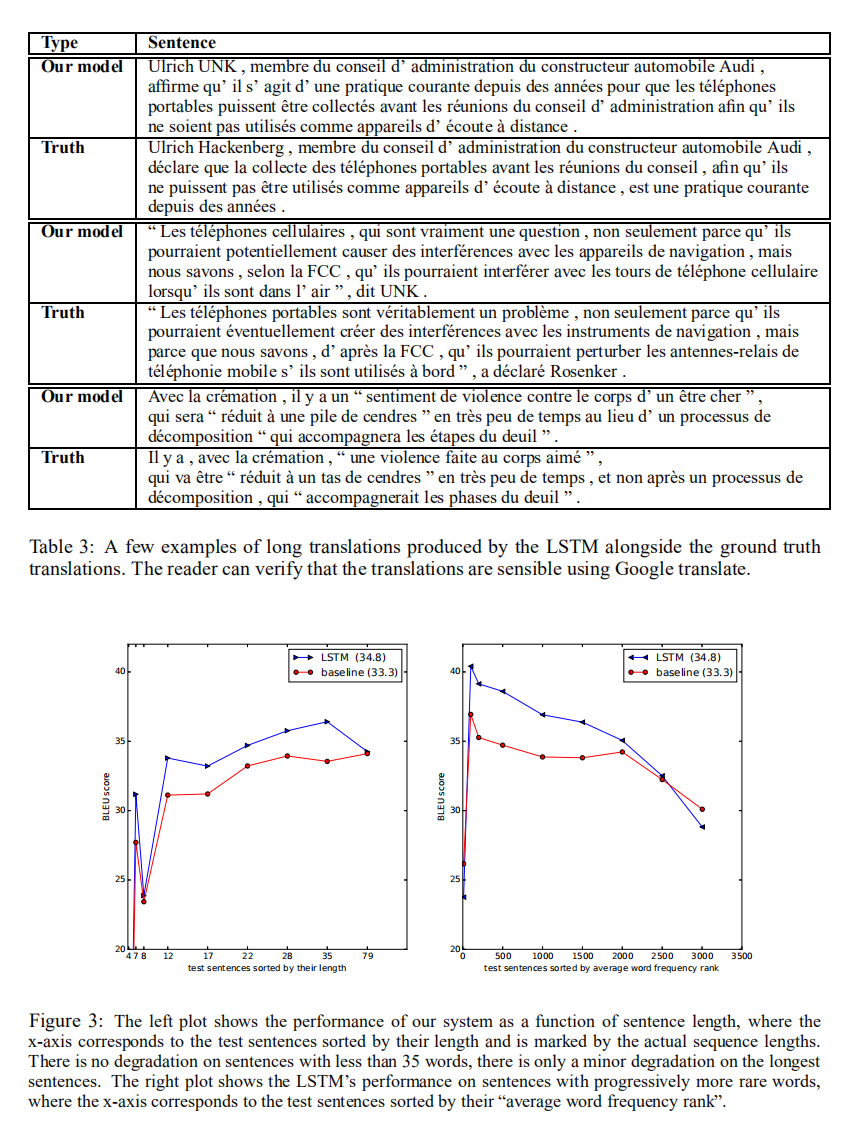

## 3.8 Model Analysis

## 3.8模型分析

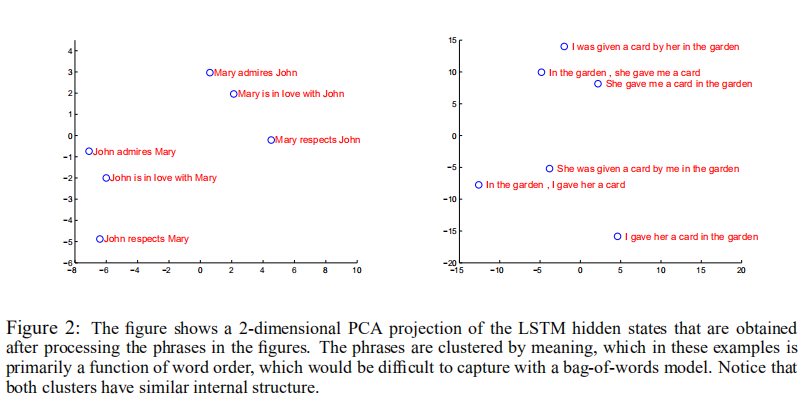

One of the attractive features of our model is its ability to turn a sequence of words into a vector of fixed dimensionality. Figure 2 visualizes some of the learned representations. The figure clearly shows that the representations are sensitive to the order of words, while being fairly insensitive to the replacement of an active voice with a passive voice. The two-dimensional projections are obtained using PCA.

我们的模型的一个吸引人的特性是它能够将一个单词序列转换成一个固定维度的向量。图2显示了一些学习到的表示。该图清楚地表明，表征对词语的顺序很敏感，而对用被动语态代替主动语态则相当不敏感。利用主成分分析得到二维投影。

# 4 Related work

# 4相关工作



There is a large body of work on applications of neural networks to machine translation. So far, the simplest and most effective way of applying an RNN-Language Model (RNNLM) or a Feedforward Neural Network Language Model (NNLM) to an MT task is by rescoring the nbest lists of a strong MT baseline [22], which reliably improves translation quality.

关于神经网络在机器翻译中的应用有大量的工作要做。到目前为止，将RNN-Language模型(RNNLM)或前馈神经网络语言模型(NNLM)应用于机器翻译任务的最简单和最有效的方法是重新划分强MT基线[22]的最佳列表，这可靠地提高了翻译质量。



More recently, researchers have begun to look into ways of including information about the source language into the NNLM. Examples of this work include Auli et al. [1], who combine an NNLM with a topic model of the input sentence, which improves rescoring performance. Devlin et al. followed a similar approach, but they incorporated their NNLM into the decoder of an MT system and used the decoder’s alignment information to provide the NNLM with the most useful words in the input sentence. Their approach was highly successful and it achieved large improvements over their baseline.

最近，研究人员开始研究将源语言信息纳入NNLM的方法。该工作的例子包括Auli等人的[1]，他们将NNLM与输入语句的主题模型相结合，这提高了重新取心的性能。Devlin等人采用了类似的方法，但是他们将NNLM合并到MT系统的解码器中，并使用解码器的对齐信息为NNLM提供输入语句中最有用的单词。他们的方法非常成功，并且比他们的基线有了很大的改进。



Our work is closely related to Kalchbrenner and Blunsom [18], who were the first to map the input sentence into a vector and then back to a sentence, although they map sentences to vectors using convolutional neural networks, which lose the ordering of the words. Similarly to this work, Cho et al.  used an LSTM-like RNN architecture to map sentences into vectors and back, although their primary focus was on integrating their neural network into an SMT system. Bahdanau et al.  also attempted direct translations with a neural network that used an attention mechanism to overcome the poor performance on long sentences experienced by Cho et al. [5] and achieved encouraging results. Likewise, Pouget-Abadie et al. attempted to address the memory problem of Cho et al. [5] by translating pieces of the source sentence in way that produces smooth translations, which is similar to a phrase-based approach. We suspect that they could achieve similar improvements by simply training their networks on reversed source sentences. End-to-end training is also the focus of Hermann et al., whose model represents the inputs and outputs by feedforward networks, and map them to similar points in space. However, their approach cannot generate translations directly: to get a translation, they need to do a look up for closest vector in the pre-computed database of sentences, or to rescore a sentence.

我们的工作与Kalchbrenner和Blunsom[18]密切相关，他们是第一个将输入的句子映射成向量然后再映射回句子的人，尽管他们使用卷积神经网络将句子映射成向量，而卷积神经网络会丢失单词的顺序。与这项工作类似，Cho等人使用类似于LSTM的RNN架构将句子映射成向量并返回，尽管他们的主要关注点是将他们的神经网络集成到SMT系统中。Bahdanau等人也尝试使用神经网络进行直接翻译，该神经网络使用了注意力机制来克服Cho等人使用[5]所经历的长句时的糟糕表现，并取得了令人鼓舞的结果。同样地，Pouget-Abadie等人试图解决Cho等人的记忆问题。他们采用类似于基于短语的方法，通过翻译源语句的片段来产生流畅的翻译。我们怀疑他们可以通过简单地训练他们的网络使用倒过来的源句来达到类似的改善。端到端训练也是Hermann等人的研究重点，他们的模型表示前馈网络的输入和输出，并将它们映射到空间中的相似点。但是，他们的方法不能直接生成翻译:为了得到翻译，他们需要在预先计算的句子数据库中查找最近的向量，或者重新编译一个句子。

# 5 Conclusion

# 5 结论



In this work, we showed that a large deep LSTM, that has a limited vocabulary and that makes almost no assumption about problem structure can outperform a standard SMT-based system whose vocabulary is unlimited on a large-scale MT task. The success of our simple LSTM-based approach on MT suggests that it should do well on many other sequence learning problems, provided they have enough training data.

在这项工作中，我们展示了一个大型的深层LSTM，它有一个有限的词汇，这使得几乎没有关于问题结构的假设可以胜过一个标准的基于SMT的系统，它的词汇在大规模的MT任务中是无限的。我们简单的基于lstm的方法在MT上的成功表明，如果他们有足够的训练数据，它在许多其他序列学习问题上应该做得很好。



We were surprised by the extent of the improvement obtained by reversing the words in the source sentences. We conclude that it is important to find a problem encoding that has the greatest number of short term dependencies, as they make the learning problem much simpler. In particular, while we were unable to train a standard RNN on the non-reversed translation problem (shown in fig. 1), we believe that a standard RNN should be easily trainable when the source sentences are reversed (although we did not verify it experimentally).

我们惊讶地发现，通过把源句中的单词倒过来，所取得的进步是如此之大。我们的结论是，重要的是找到具有最多短期依赖关系的问题编码，因为它们使学习问题更简单。特别地，虽然我们无法在非反向翻译问题上训练标准的RNN(如图1所示)，但我们认为，当源语句被反向翻译时，标准的RNN应该很容易训练(尽管我们没有通过实验验证)。



We were also surprised by the ability of the LSTM to correctly translate very long sentences. We were initially convinced that the LSTM would fail on long sentences due to its limited memory, and other researchers reported poor performance on long sentences with a model similar to ours. And yet, LSTMs trained on the reversed dataset had little difficulty translating long sentences.

我们也对LSTM能够正确翻译非常长的句子的能力感到惊讶。我们最初认为LSTM在长句上会失败，因为它的记忆能力有限，其他研究人员报告说，使用类似我们的模型，长句的表现很差。然而，在反向数据集上训练的LSTMs在翻译长句子时却没有什么困难。



Most importantly, we demonstrated that a simple, straightforward and a relatively unoptimized approach can outperform an SMT system, so further work will likely lead to even greater translation accuracies. These results suggest that our approach will likely do well on other challenging sequence to sequence problems.

最重要的是，我们证明了一种简单、直接和相对未经优化的方法可以胜过SMT系统，因此进一步的工作可能会导致更大的翻译准确性。这些结果表明，我们的方法很可能在其他具有挑战性的序列到序列问题上做得很好。

# 6 Acknowledgments

# 6致谢



We thank Samy Bengio, Jeff Dean, Matthieu Devin, Geoffrey Hinton, Nal Kalchbrenner, Thang Luong, Wolfgang Macherey, Rajat Monga, Vincent Vanhoucke, Peng Xu, Wojciech Zaremba, and the Google Brain team for useful comments and discussions.

我们感谢Samy Bengio、Jeff Dean、Matthieu Devin、Geoffrey Hinton、Nal Kalchbrenner、Thang Luong、Wolfgang Macherey、Rajat Monga、Vincent Vanhoucke、Peng Xu、Wojciech Zaremba和谷歌Brain团队提供的有用意见和讨论。
